In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [36]:
# Load Dataset

df = pd.read_excel("perfume_data.xlsx")

# Tampilkan info awal
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ajayeb    19 non-null     object
 1   64558     19 non-null     int64 
 2   64556     19 non-null     int64 
 3   64543     19 non-null     int64 
 4   64543.1   19 non-null     int64 
 5   64541     19 non-null     int64 
 6   64543.2   19 non-null     int64 
 7   64543.3   19 non-null     int64 
 8   64541.1   19 non-null     int64 
 9   64541.2   19 non-null     int64 
 10  64541.3   19 non-null     int64 
 11  64541.4   19 non-null     int64 
 12  64541.5   19 non-null     int64 
 13  64541.6   19 non-null     int64 
 14  64528     19 non-null     int64 
 15  64528.1   19 non-null     int64 
 16  63529     19 non-null     int64 
 17  63529.1   19 non-null     int64 
 18  64541.7   19 non-null     int64 
 19  64541.8   19 non-null     int64 
 20  64541.9   19 non-null     int64 
 21  64541.10  19 non-n

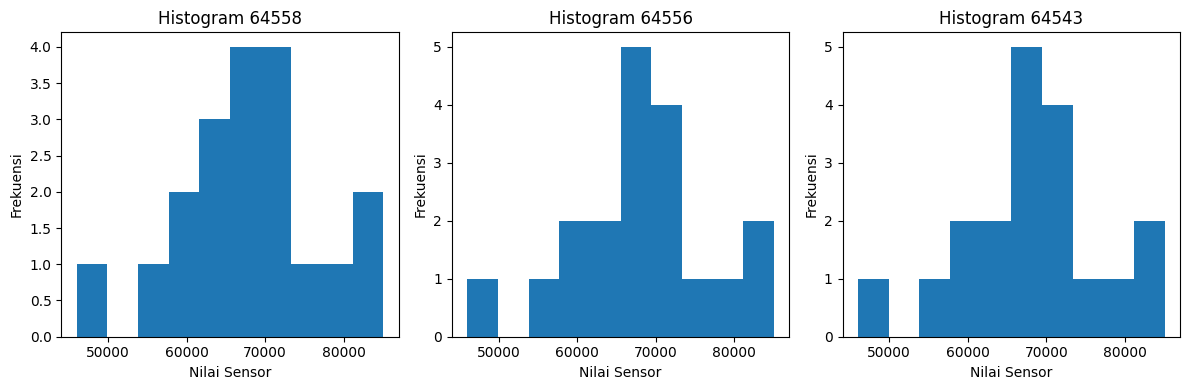

In [3]:
#@title Histogram Distribusi Nilai Sensor
# Pilih beberapa sensor sebagai contoh
sensor_columns = df.columns[1:4]  # sensor_1, sensor_2, sensor_3

plt.figure(figsize=(12, 4))

for i, col in enumerate(sensor_columns):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[col], bins=10)
    plt.title(f"Histogram {col}")
    plt.xlabel("Nilai Sensor")
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()


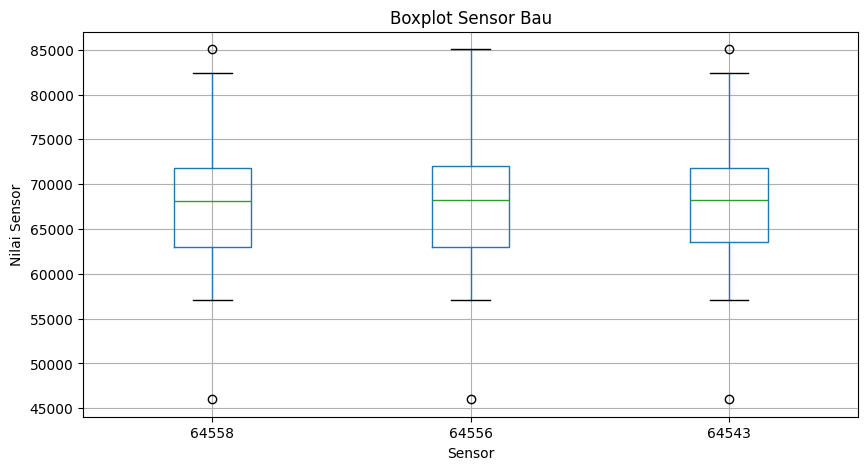

In [4]:
#@title Boxplot untuk Deteksi Outliers
plt.figure(figsize=(10, 5))

# Boxplot untuk beberapa sensor
df[sensor_columns].boxplot()
plt.title("Boxplot Sensor Bau")
plt.ylabel("Nilai Sensor")
plt.xlabel("Sensor")

plt.show()


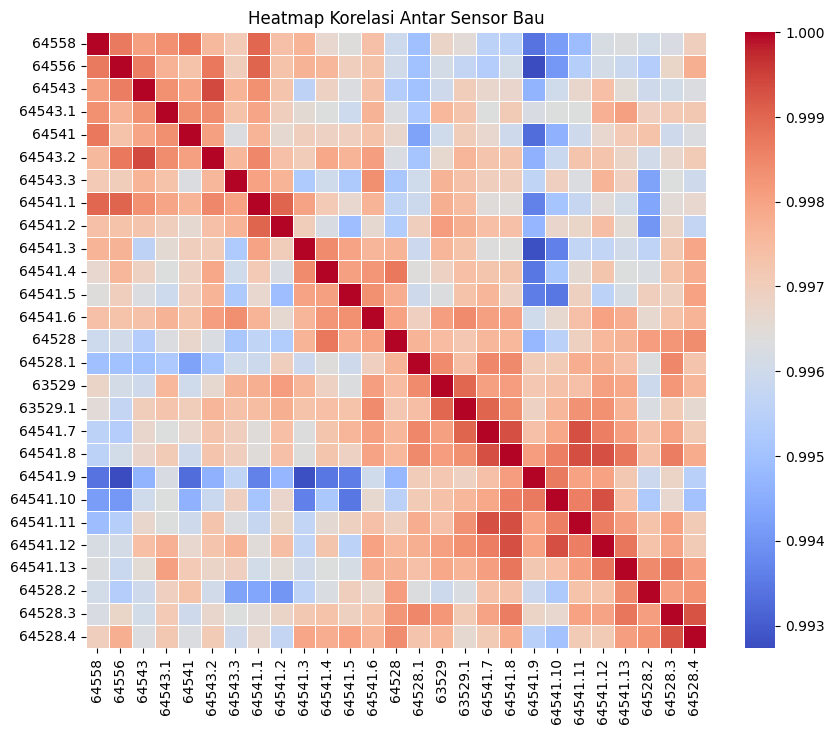

In [5]:
#@title Heatmap Korelasi Antar Sensor
# Ambil hanya kolom sensor (numerik)
sensor_data = df.iloc[:, 1:-1]

# Hitung korelasi
corr_matrix = sensor_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Sensor Bau")

plt.show()


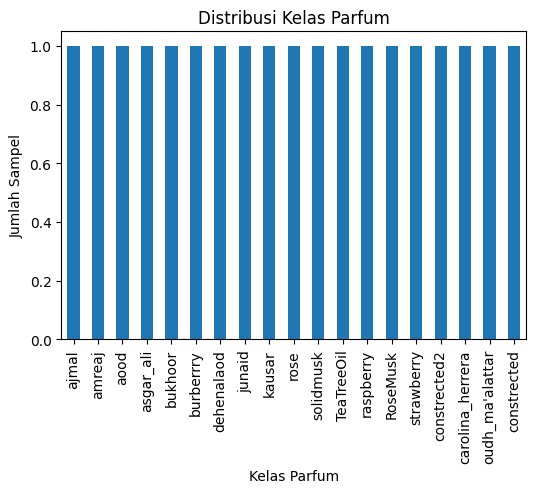

In [6]:
#@title Distribusi Kelas Parfum
plt.figure(figsize=(6, 4))

df['ajayeb'].value_counts().plot(kind='bar')
plt.title("Distribusi Kelas Parfum")
plt.xlabel("Kelas Parfum")
plt.ylabel("Jumlah Sampel")

plt.show()

In [37]:
#@title Pisahkan Fitur dan Label
X = df.iloc[:, 1:-1]
y = df['ajayeb']

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [38]:
#@title Encoding Label
scaler = StandardScaler()
X.columns = X.columns.astype(str) # Convert column names to string
X_scaled = scaler.fit_transform(X)

In [39]:
#@title Scaling Data
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

In [11]:
#@title Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)


In [40]:
#@title Logistic Regression (Baseline)
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_lr))


Accuracy Logistic Regression: 0.0


In [41]:
#@title Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))


Accuracy Random Forest: 0.0


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))


Accuracy Random Forest: 0.0


In [43]:
#@title Classification Report
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))



Logistic Regression Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0

Random Forest Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       0.0

    accuracy                 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [44]:
#@title Build Model MLP
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_encoded))

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
#@title Compile Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [46]:
#@title Training Model
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=8,
    verbose=1
)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.0972 - loss: 3.1019 - val_accuracy: 0.0000e+00 - val_loss: 2.8518
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1944 - loss: 3.1095 - val_accuracy: 0.0000e+00 - val_loss: 2.9093
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1528 - loss: 2.9975 - val_accuracy: 0.0000e+00 - val_loss: 2.9795
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.0972 - loss: 3.0339 - val_accuracy: 0.0000e+00 - val_loss: 3.0329
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1528 - loss: 3.0064 - val_accuracy: 0.0000e+00 - val_loss: 3.0903
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1528 - loss: 2.8755 - val_accuracy: 0.0000e+00 - val_loss: 3.1519
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.1528 - loss: 2.9182 - val_accuracy: 0.0000e+00 - val_loss: 3.2147
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1528 - loss: 2.8353 - val_accurac

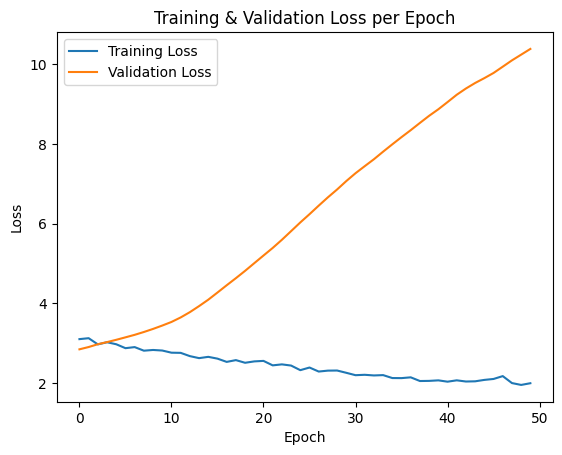

In [47]:
#@title Training & Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss per Epoch')
plt.legend()
plt.show()


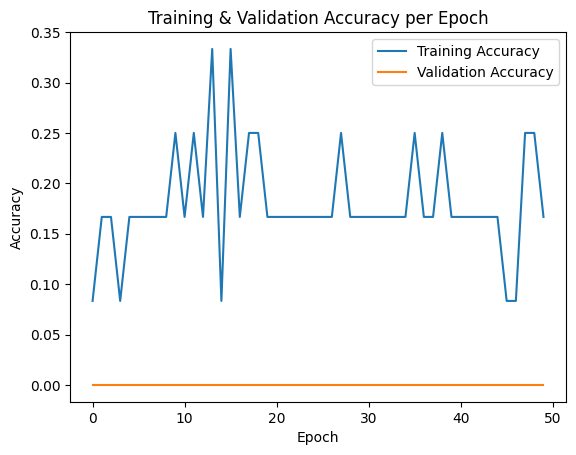

In [48]:
#@title Training & Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy per Epoch')
plt.legend()
plt.show()


In [49]:
#@title Evaluasi Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy MLP:", accuracy_score(y_test, y_pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Accuracy MLP: 0.0


In [50]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 19)             │           627 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,499 (52.73 KB)

 Trainable params: 4,499 (17.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,000 (35.16 KB)

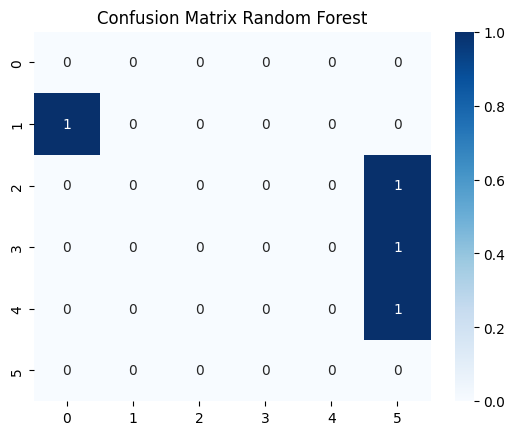

In [51]:
#@title Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Random Forest")
plt.show()


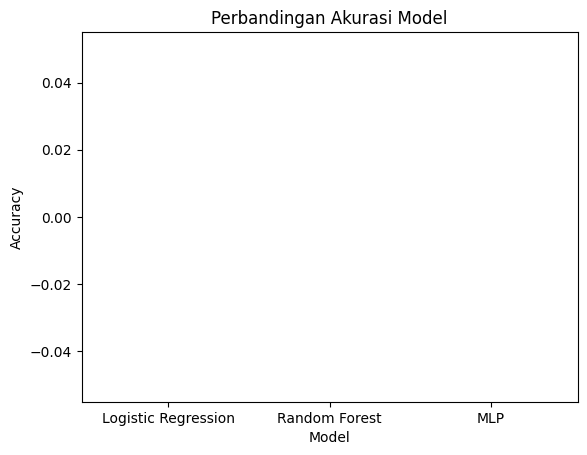

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Get accuracy scores from previous steps
from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)

# y_pred_classes was already computed
acc_mlp = accuracy_score(y_test, y_pred_classes)

# Data hasil evaluasi (contoh, sesuaikan dengan hasil )
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'MLP'],
    'Accuracy': [acc_lr, acc_rf, acc_mlp]
})

# Plot perbandingan
plt.figure()
plt.bar(results['Model'], results['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')
plt.show()